## Support Vector Machine (SVM)

A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.
SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.

Innate Separation within the data can be of two types:
1. Linear Separation: The two classes can clearly be separated easily with a straight line (they are linearly separable)

Logistic regression:

$$h_{\theta}(x) = \frac{1}{1+e^{\theta Tx}}$$

if y=1 , then  $h_{\theta}(x) \approx 1, \theta^{T}x>>0$

if y=0 , then $h_{\theta}(x)\approx0, \theta^{T}x<<0$

Cost func = $-(ylogh_{\theta}(x)+(1-y)log(1-\frac{1}{1+e^{-\theta Tx}})) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$

SVM COST FUCTION:

From logistic cost function:

$$C\sum_{i=1}^{m}y^{(i)} cost_{1}(\theta^{T}x^{(i)}) + (1-y^{(i)})cost_{0}(1-h_{\theta}(x^{(i)})) + \frac{1}{2}\sum_{i=1}^{n}\theta^{2}_{j}$$
rough form:

$CA+B$ , where `C` is the regularization parameter $C\approx \frac{1}{\lambda}$

The hypothesis of SVM gives:

$h_{\theta}(x) = 1$ if $\theta^{T}x\geq1$

$h_{\theta}(x) = 0$ if $\theta^{T}x\leq-1$

There is a much greater margin because the boundary between True and False  classification is much larger

### SVM AS LARGE MARGIN CLASSIFIERS
The hypothesis of SVM gives:

$h_{\theta}(x) = 1$ if $\theta^{T}x\geq1$

$h_{\theta}(x) = 0$ if $\theta^{T}x\leq-1$

There is a much greater margin because the boundary between True and False  classification is much larger because of the hypothesis.

#### INTUITION BEHIND SVM
<img src="../notes_images/linear_svm_intution.png">

The main aim of optimization is to have small values of $\theta_{i}$ which is only possible when the perpendicular distance of the $x^{i}$ and the decision boundary is large i.e. $p \approx large$.

Hence the decision boundaries of Right is selected, over left.

Text(0.5, 1.0, '$h(\\theta)x$')

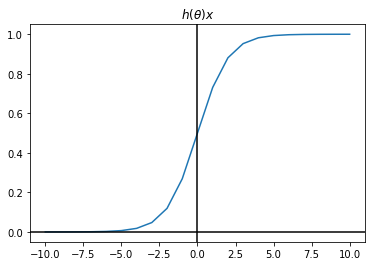

In [16]:
import numpy as np
from matplotlib import pyplot as plt

thetaTx = np.arange(-10,11,1)
htheta = 1/(1+np.exp(-thetaTx))

plt.plot(thetaTx, htheta)
plt.axvline(x=0,c="black")
plt.axhline(y=0, c="black")
plt.title(r"$h(\theta)x$")

## Linear SVM Classification

<br><br>

<img src="./notes_images/linear_svm.png">

__fig 2 above shows svm classification and decision boundaries__
1. It is used for linearly separable classes.
2. The decision boundary of an SVM classifier not only separates the two classes but also stays as far away from the closest training instances as possible. It is like fitting the widest distance between the two classes. This is called `large margin classification`.
3. Adding more training instances “off the street” will not affect the decision boundary at all: it is fully determined (or “supported”) by the instances located on the edge of the street. These instances are called the support vectors (they are circled in the following picture.
4. SVMs are sensitive to feature scaling. The decision boundaries are fitted better.
<img src="./notes_images/scaling_linear_svm.png">

### Soft Margin Classification

Hard Margin Classification:
1. It only works if the data is linearly separable, and second it is quite sensitive to outliers.

The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called soft margin classification.

In scikit learn SVM we use `C` hyperparameter to control it. Its value affects the decision boundaries as follows:
1. A smaller C value leads to a wider street but more margin violations.
2. Using a high C value the classifier makes fewer margin violations but ends up with a smaller margin

In [148]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]
y = (iris["target"]==2).astype(int)
svm_clf = Pipeline(
[
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
]
)
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [149]:
get_step_size = lambda f,l,n: (l-f)/(n)
lastx = np.abs(np.max(X[:,0]))
firstx = np.abs(np.min(X[:,0]))
step_size = get_step_size(firstx,lastx,50)
x1_axis = np.arange(firstx,lastx,step_size)
#firsty = 
lasty = np.abs(np.max(X[:,1]))
firsty = np.abs(np.min(X[:,1]))
step_sizey = get_step_size(firsty,lasty,50)
x2_axis = np.arange(firsty, lasty, step_sizey)

In [150]:
#np.hstack([x1_axis, x2_axis])
dset = np.hstack([x1_axis.reshape((50,1)),x2_axis.reshape((50,1))])
res = svm_clf.predict(dset)

import matplotlib.pyplot as plt

In [151]:
# res_y = svm_clf.predict(X)
# class1_index = np.where(res_y==1)
# class2_index = np.where(res_y==0)
# class1_feat = X[class1_index]
# class2_feat = X[class2_index]
sc = StandardScaler()
scaled_x = sc.fit_transform(X)


/home/iamtheuserofthis/anaconda3/envs/tf_dev/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


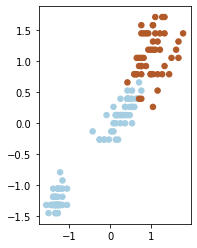

In [152]:
# #plt.plot(dset[:,0], dset[:,1],'r-')
# plt.plot(class1_feat[:,0], class1_feat[:,1] ,'g.')
# plt.plot(class2_feat[:,0], class2_feat[:,1], 'b.')
# #plt.legend()
# plt.show()

clf = LinearSVC(C=5, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
support_vectors = scaled_x[support_vector_indices]

plt.subplot(1, 2, i + 1) #1 row 2 column, ith subplot
plt.scatter(scaled_x[:, 0], scaled_x[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
t = np.meshgrid(np.linspace(xlim[0], xlim[1],50),np.linspace(ylim[0], ylim[1], 50))
#xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
#                         np.linspace(ylim[0], ylim[1], 50))
#Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
#Z = Z.reshape(xx.shape)
#t[0].shape
xs1 = np.linspace(1,10, 5)
xs2 = np.linspace(2,10,5)


In [161]:
x1,y1 = np.meshgrid(xs1,xs2)
print(x1)
print(x1.ravel())
print(x1.reshape(1,x1.shape[0]*x1.shape[1]))

[[ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]
 [ 1.    3.25  5.5   7.75 10.  ]]
[ 1.    3.25  5.5   7.75 10.    1.    3.25  5.5   7.75 10.    1.    3.25
  5.5   7.75 10.    1.    3.25  5.5   7.75 10.    1.    3.25  5.5   7.75
 10.  ]


/home/iamtheuserofthis/anaconda3/envs/tf_dev/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/iamtheuserofthis/anaconda3/envs/tf_dev/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


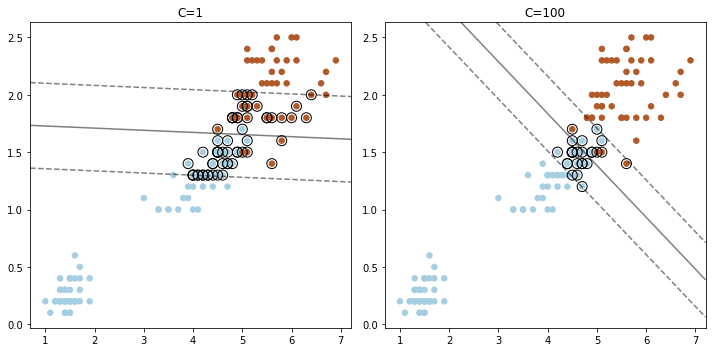

In [87]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

Instead of using the LinearSVC we can follow the following two approachesL
1. SVC class, using ```SVC(kernel="linear", C=1)``` , but it is much slower, especially with large training sets.
2. The SGDClassifier class, with ```python SGDClassifier(loss="hinge",alpha=1/(m*C))``` .  This applies regular Stochastic Gradient Descent to train a linear SVM classifier. It does not converge as fast as the LinearSVC class, but it can be useful to handle huge datasets that do not fit in memory.

## Nonlinear SVM Classification


#### USING KERNELS FOR NONLINEAR SVM
Defining new features by the use of kernels on the parameters.

e.g. 
Predict y=1 if:

$\theta_{0}+\theta_{2}x_{2}+\theta_{3}x_{1}x_{2}+ \theta_{4}x_{1}^2+\theta_{5}x_{2}^2 \geq 0$

Predict y=0, Otherwise

We saw the features were simply polynomial values but we can  generalise the expression as following:

$\theta_{0}+\theta_{1}f_{1} +\theta_{2}f_{2}+\theta_{3}f_{3}+ \theta_{4}f_{4}+... \geq 0$

f can be the similarity function as in the Gaussian Kernel

$$f_{1} = similarity(x, l^{(1)})= e^{-\frac{||x-l^{1}||{2}}{2\sigma^{2}}}$$
$$f_{2} = similarity(x, l^{(2)})= e^{-\frac{||x-l^{2}||{2}}{2\sigma^{2}}}$$
$$f_{3} = similarity(x, l^{(3)})= e^{-\frac{||x-l^{3}||{2}}{2\sigma^{2}}}$$

If $x\approx f^{1}$ then $f_{1}\approx1$

If $x\ far\ from f^{1}$ then $f_{1}\approx0$

Effect of sigma in 3 Dimensions
<img src="../notes_images/gaussian_kernel_svm.png" height=500 width=500>

Prediction with Gaussian Kernal in 2D data:
<img src="../notes_images/2d_gaussian_pred.png" height=500 width=500>

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# to fit the data with non linear features
